# Write a Data Science Blog Post: Stackoverflow's 2017 servey data

## Introduction

Each year since 2011, Stack Overflow has asked developers about their favorite technologies, coding habits, and work preferences, as well as how they learn, share, and level up. The 2017 survey data covers 64,000 reviews and more than 150 questions. The original survey article is published here: https://insights.stackoverflow.com/survey/2017.

In this project, i used data from Stackoverflow’s 2017 Annual Developer Survey, to take a closer look at these questions:
> 1) Which were the most popular programming languages in 2017?

> 2) Which programming languages were the most people interested to work with over the next year?

> 3) Which programming language was most people loved? 

In [28]:
# import library
import numpy as np
import pandas as pd
import collections
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display all columns
pd.pandas.set_option('display.max_columns', None)

# plot style
sns.set_style('darkgrid')

In [29]:
# unzip data from zip file
with zipfile.ZipFile("2017/stack-overflow-developer-survey-2017.zip","r") as zip_ref:
    zip_ref.extract("survey_results_public.csv","2017")

In [22]:
# read data from csv
df2017 = pd.read_csv('2017/survey_results_public.csv')

In [37]:
df2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [30]:
# to answer 3 questions in this project, i only care about these columns
# HaveWorkedLanguage
# WantWorkLanguage
df = df2017[['HaveWorkedLanguage','WantWorkLanguage']]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HaveWorkedLanguage  36625 non-null  object
 1   WantWorkLanguage    33771 non-null  object
dtypes: object(2)
memory usage: 803.1+ KB


In [32]:
# drop null
df_clean = df.dropna()

In [36]:
df_clean.head()

,HaveWorkedLanguage,WantWorkLanguage
0,Swift,Swift
1,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL
2,Java; PHP; Python,C; Python; Rust
3,Matlab; Python; R; SQL,Matlab; Python; R; SQL
5,JavaScript; PHP; Rust,Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...


In [38]:
# Each column contains lists of programming languages that separated by ;
# This function will split 1 column to multiple columns
def split_col(df_col, separator=';'):
    ''' Split a column by separator to multiple columns.
        Returns a data frame.
    '''
    # result
    df = df_col.to_frame()
    # column's name
    columns = []
    for index, data  in df_col.iteritems():
        # split by separator
        tmp_split = data.split(separator)
        for value in tmp_split:
            # remove space
            col = value.strip()
            if not col in df.columns:
                columns.append(col)
                df[col] = 0
            df.at[index, col] = 1
    return df[columns]

### Question 1) Which were the most popular programming languages in 2017?

In [55]:
# split HaveWorkedLanguage column to multiple columns
df_have_worked = split_col(df_clean.HaveWorkedLanguage)
df_have_worked

,Swift,JavaScript,Python,Ruby,SQL,Java,PHP,Matlab,R,Rust,CoffeeScript,Clojure,Elixir,Erlang,Haskell,C#,Objective-C,Assembly,C,C++,VB.NET,Perl,Scala,F#,TypeScript,Lua,VBA,Groovy,Go,Smalltalk,Visual Basic 6,Common Lisp,Dart,Julia,Hack
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51386,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51387,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
51388,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


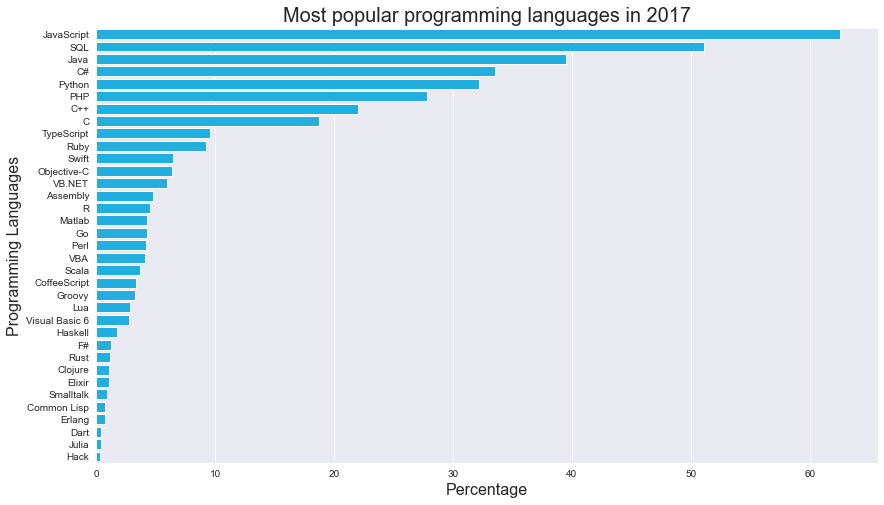

In [56]:
# plot
most_popular = df_have_worked.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(14,8))
sns.barplot(x = most_popular, y = most_popular.index, color='deepskyblue')

plt.xlabel("Percentage", fontsize = 16)
plt.ylabel("Programming Languages", fontsize = 16)
plt.title('Most popular programming languages in 2017', size = 20)
plt.show();

In [63]:
most_popular.head(3)

JavaScript    62.569849
SQL           51.083221
Java          39.471089
dtype: float64

Most popular programming languages in 2017: 

JavaScript (62%),

SQL (51%)

Java (39%)


JavaScript was the most commonly used programming language (62%). It is used in many places: servers, Internet of Things, website...The other reason is that JavaScript is a high-level, dynamically-typed language that can easily to learn and work with.

SQL takes second place (51%), it's no surprise, when we work with relational databases, we need SQL.
SQL is nothing new and there are many large companies that make use of it.


Java takes third place (39%). The reason is that Java applications can run on several different types of platform, it is an OOP languages, robust, secure and simpler to learn. Many large companies use Java for their applications, even that Java is old, we still have to maintain applications that developed by Java.

### Question 2) Which programming languages were the most people interested to work with over the next year?

In [58]:
# split WantWorkLanguage column to multiple columns
df_want_work= split_col(df_clean.WantWorkLanguage)
df_want_work

,Swift,Java,Python,Ruby,SQL,C,Rust,Matlab,R,Clojure,Elixir,Erlang,Haskell,TypeScript,JavaScript,Julia,Scala,F#,Go,C#,Objective-C,Assembly,C++,VB.NET,Perl,Hack,PHP,Lua,Groovy,CoffeeScript,Common Lisp,Dart,Smalltalk,VBA,Visual Basic 6
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
51386,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
51387,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51388,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


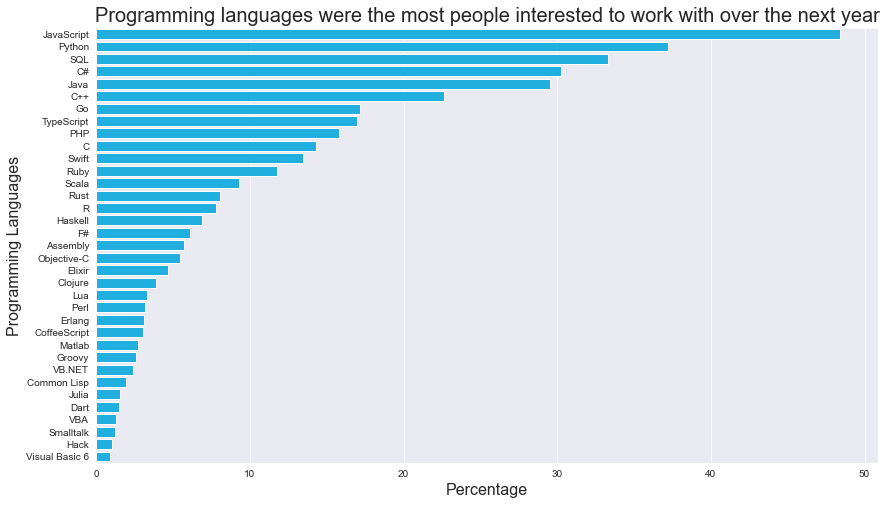

In [68]:
# plot
most_interest = df_want_work.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(14,8))
sns.barplot(x = most_interest, y = most_interest.index, color='deepskyblue')

plt.xlabel("Percentage", fontsize = 16)
plt.ylabel("Programming Languages", fontsize = 16)
plt.title('Programming languages were the most people interested to work with over the next year', size = 20)
plt.show();

In [64]:
most_interest.head(3)

JavaScript    48.420738
Python        37.226954
SQL           33.288510
dtype: float64

Programming languages were the most people interested to work with over the next year: 

JavaScript (48%)

Python (37%)

SQL (33%)

Most people interested to work with JavaScript in the nex year.
The reason is that it is used in many places, can easily to learn and work with.

Python features at number 2 (37%). It is really easy to learn and use, has a strong ecosystem of libraries.
Python is suited for a variety of domains such as  machine learning, big data... The other reason is that machine learning was the key trend 2017, and most people were using python for scientific research.

The third is SQL, it is necessary for working with relational databases.

### Question 3) Which programming languages was most people loved?

In [60]:
#  programming languages was most people loved 
# in other words: the programming languages that people have used and want to continue using it over the next year
df_love = df_have_worked & df_want_work

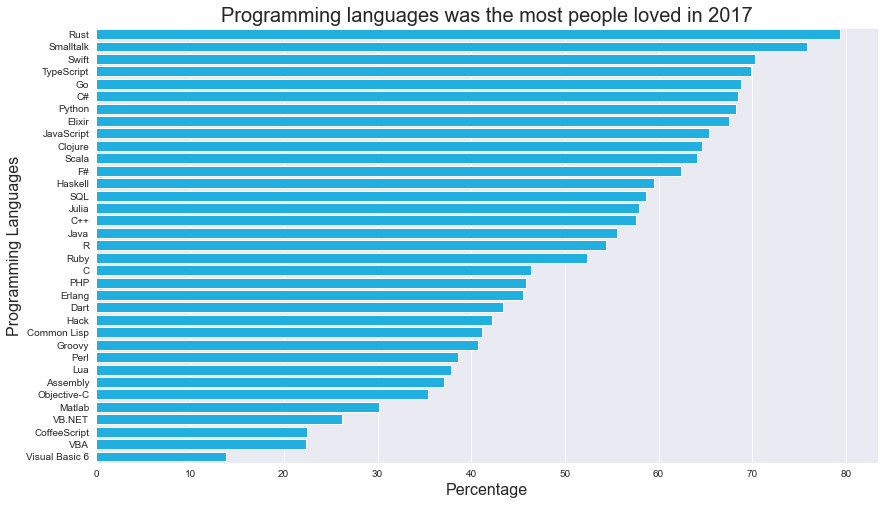

In [67]:
# plot
love = (df_love.sum() / df_have_worked.sum() * 100).sort_values(ascending=False)


plt.figure(figsize=(14,8))
sns.barplot(x = love, y = love.index, color='deepskyblue')

plt.xlabel("Percentage", fontsize = 16)
plt.ylabel("Programming Languages", fontsize = 16)
plt.title('Programming languages was the most people loved in 2017', size = 20)
plt.show();

In [66]:
love.head(1)

Rust    79.373368
dtype: float64


It surprised me that Rust was the most loved programming language in 2017. I have never heard of this programming language before.
Moreover, when we look at question 1 and question 2: very few people have used Rust.
In fact, the data tell us that people loved Rust. Is it worth to learning Rust? I think we should give it a try.

So, What is Rust?

Rust is a multi-paradigm, general-purpose programming language designed for performance and safety, especially safe concurrency. Syntactically similar to C++,Rust is notable for enforcing memory safety — that is, that all references point to valid memory — without requiring the use of a garbage collector or reference counting like other memory-safe languages.Memory safety is enforced by the compiler's borrow checker, which tracks object lifetime and variable scope as references are passed throughout the program. Rust is considered a systems programming language with mechanisms for low-level memory management, but also offers high-level features such as functional programming. (https://en.wikipedia.org/wiki/Rust_(programming_language))

For more information, please visit Rust's homepage https://www.rust-lang.org/

### Conclusion

In this article, we took a look at what were the most popular, the most interest and the most loved programming languages, according to Stackoverflow’s 2017 Survey data.

1. The older programming languages such as JavaScript, SQL, and Java  are still in use.

2. Besides the old languages, many people started to want to use Python in 2017. It seems because artificial intelligence was the trend in 2017.

3. It surprised that Rust was the most loved programming language in 2017. The reason is because Rust offers high performance similar to C/C++, but more security and more. People have used it, like it, and then want to keep sticking to it.